# Importing and setup


In [ ]:
import tensorflow as tf

# helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


In [ ]:
# access the Fashion Mnist data directly from tensorflow

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

    The train_images and train_labels arrays are the training set—the data the model uses to learn.
    The model is tested against the test set, the test_images, and test_labels arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

# Look at the data

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [ ]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


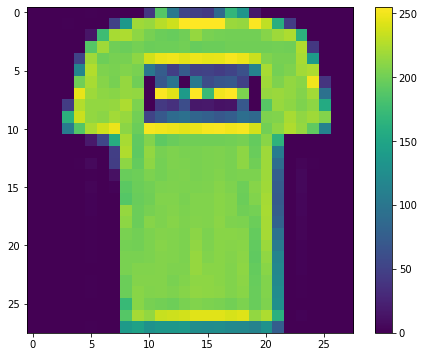

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

# Preprocessing

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

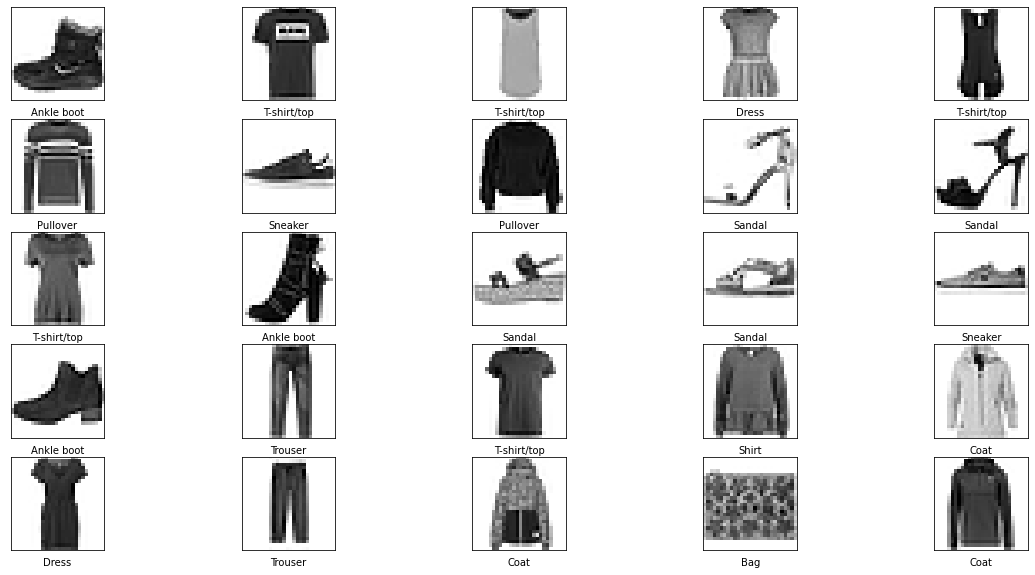

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics='accuracy')

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4990 - accuracy: 0.8228
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3816 - accuracy: 0.8622
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3410 - accuracy: 0.8742
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3169 - accuracy: 0.8836
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2979 - accuracy: 0.8897
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2841 - accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2693 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2596 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2469 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 1s - loss: 0.3323 - accuracy: 0.8806 - 1s/epoch - 3ms/step

Test accuracy: 0.8805999755859375


With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.



In [ ]:
probability_model = tf.keras.Sequential([
    model, tf.keras.layers.Softmax()
])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([7.0361602e-07, 5.4173952e-08, 1.0389882e-09, 6.6138187e-13,
       3.7594475e-08, 2.1229875e-03, 5.8710341e-08, 6.7815264e-03,
       9.7437685e-09, 9.9109453e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                 100*np.max(predictions_array),
                                 class_names[true_label]),
                                 color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

With the model trained, It can be used to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

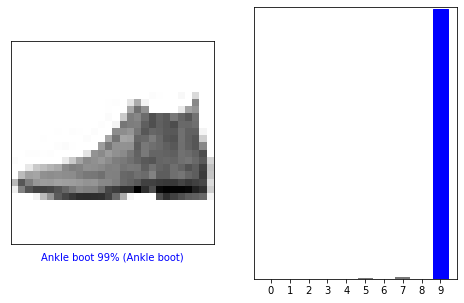

In [ ]:
# i = 0
# plt.figure(figsize=(8, 5))
# plt.subplot(1, 2, 1)
# plot_image(i, predictions[i], test_labels, test_images)
# plt.subplot(1, 2, 2)
# plot_value_array(i, predictions[i], test_labels)
# plt.show()

i = 0
plt.figure(figsize=(8, 5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


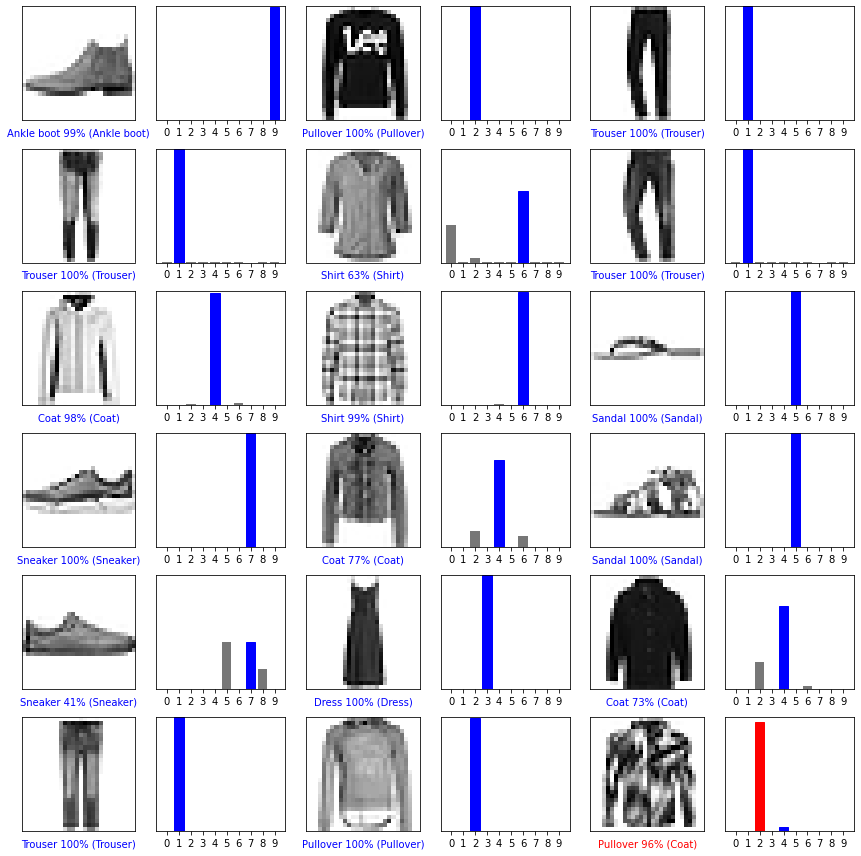

In [ ]:
num_rows = 6
num_cols = 3

num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset

img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 65ms/step
[[1.1571150e-04 1.8847300e-10 9.9931991e-01 3.2155661e-08 3.1508468e-04
  1.2591792e-07 2.4926296e-04 2.8908178e-11 1.0496642e-11 1.7976965e-12]]


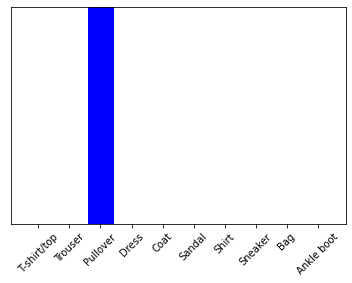

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2